<h1><center>Trinomial model for pricing Options</center></h1>

# Group number 5 

# by Dr. Long Teng

## Group number 5 

Rajat Kheni (220202938)(rajatkheni44@uni-Koblenz.de)

Varun Modi(221100512 )(varunmodi@uni-Koblenz.de)

Leela Prasad Gurugubelli  (221100436)(leelaprasad@uni-Koblenz.de) 

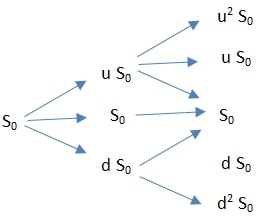

https://www.google.com/search?q=trinomial+model&tbm=isch&source=iu&ictx=1&vet=1&fir=OWWc9e9LyeGCOM%252CmKBuk64pmEfBXM%252C_%253BYNsuNGvyhTGhLM%252Cj6CPcUlbnwzXhM%252C_%253BIN5dx2RmBtUeqM%252C6m202FAd3XXS3M%252C_%253Be3Tt7QJLmzYO5M%252CmJ64us9bdqeY2M%252C_%253BQKpSP5qxQbLIlM%252CYOwIB-a0fqHx_M%252C_&usg=AI4_-kR8imq18p_qRA3b9utxTNwKLNKGsw&sa=X&ved=2ahUKEwiFlaz1tvT7AhU0hf0HHcYSDt0Q_h16BAhiEAE#imgrc=YNsuNGvyhTGhLM

In [6]:
import math
import numpy as np

In [7]:
# assume all given Input parameters 
#sigma = volatality
#k is strike price
#S0 is intial strike price
#N is number of time steps
sigma = 0.2
K = 100
S0 = 100
N = 2
r = 0.05
T = 1
d_t = T / N

Multiplier on the stock price for an up move u is,
<h1><center>$u = e^{\sigma \sqrt{2\Delta t}}$</center></h1>

Multiplier on the stock price for a down move u is,
<h1><center>$d = e^{-\sigma \sqrt{2\Delta t}}$</center></h1>

Multiplier on the stock price for a middle move u is,
<h1><center>$m = ud = 1$</center></h1>

In [8]:
#1) defining a function to create up and down factors

def up_down_factors(sigma, d_t):
   
    u=math.exp(sigma*math.sqrt(2*d_t));
    d=math.exp(-sigma*math.sqrt(2*d_t));
    return u,d

In [9]:
#printing up amnd down factors
u, d = up_down_factors(sigma, d_t)
print("u =",u)
print("d=", d)

u = 1.2214027581601699
d= 0.8187307530779818


In [10]:
#2) defining a function to calculate the probabilities in the trinomial model

def probability(r, sigma, d_t):
    
    p_d=((math.exp(sigma*math.sqrt(d_t/2))-math.exp(r*(d_t/2)))/
         (math.exp(sigma*math.sqrt(d_t/2))-math.exp(-sigma*math.sqrt(d_t/2))))**2
    p_u=((math.exp(r*(d_t/2))-math.exp(-sigma*math.sqrt(d_t/2)))/
         (math.exp(sigma*math.sqrt(d_t/2))-math.exp(-sigma*math.sqrt(d_t/2))))**2
    p_m=1-p_u-p_d;
   

    return p_u,p_d,p_m

In [11]:
#printing the three probabilities of the trinomial model
p_u, p_d, p_m = probability(r, sigma, d_t)
print("p_u=",p_u)
print("p_d=",p_d)
print("p_m=",p_m)


p_u= 0.28923784494640853
p_d= 0.2136211010335806
p_m= 0.49714105402001085


In [12]:
# defining a function to calculate stock prices of the trinomial model after giving 
#some paramets( up and down factors and intial stockk price) as input to the model

def stock_price(S0, N, u, d):
    
    S = np.zeros((N*2+1,N+1))
    S[0,0]=S0
    for i in range(N*2+1):
        for j in range(0,N+1):
            if i==j:
                S[j,i]=S0
           
            elif i-j<=j: # d=1/u
                S[i,j]=(d**(i-j))*S0                         
    return S

In [13]:
#printing the stock prices of the trinomial model with N steps
S=stock_price(S0, N, u, d)
print("Stock Prices")
print(S)

Stock Prices
[[100.         122.14027582 149.18246976]
 [  0.         100.         122.14027582]
 [  0.          81.87307531 100.        ]
 [  0.           0.          81.87307531]
 [  0.           0.          67.0320046 ]]


In [14]:
# defining a function to calculate european call and put of the trinomial model using the three probabilities
# and other parameters as input

def priceTriEuro(N, K, r, S, p_u, p_d, p_m, d_t):
    
    
    C = np.zeros((2*N + 1, N + 1))
    P = np.zeros((2*N + 1, N + 1))
   
    for k in range(0, 2*N + 1):
        if S[k][N]-K <=0: # last column
            C[k][N]=0
        else:
            C[k][N] = S[k][N] - K
        if K-S[k][N]<=0:
            P[k][N]=0
        else:
            P[k][N] = K - S[k][N]
    #3)Backward (value) iteration for options
    for i in range(N-1, -1, -1):   
        for j in range(0,  i*2 + 1):
            C[j][i] = math.exp(-r*d_t) * (p_d*C[j+2][i+1] + p_m*C[j+1][i+1] + p_u*C[j][i+1])
            P[j][i] = math.exp(-r*d_t) * (p_d*P[j+2][i+1] + p_m*P[j+1][i+1] + p_u*P[j][i+1])
    return C, P



In [15]:
#printing european call and put values of trinomial model 

C, P = priceTriEuro(N, K, r, S, p_u, p_d, p_m, d_t)
print('European Call')
print(C)
print("\n")
print('European Put')
print(P)

European Call
[[ 9.97052292 24.60928461 49.18246976]
 [ 0.          6.24569514 22.14027582]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


European Put
[[ 5.09346537  0.          0.        ]
 [ 0.          3.77668634  0.        ]
 [ 0.         15.6579159   0.        ]
 [ 0.          0.         18.12692469]
 [ 0.          0.         32.9679954 ]]


In [16]:
# defining a function to calculate american call and put of the trinomial model using the three probabilities
# and other parameters as input

def priceTriAmer(N, K, r, S, p_u, p_d, p_m, d_t):
    
    C = np.zeros((2*N + 1, N + 1))
    P = np.zeros((2*N + 1, N + 1))

   
    for k in range(0, 2*N + 1):
        if S[k][N]-K <=0:
            C[k][N]=0
        else:
            C[k][N] = S[k][N] - K
        if K-S[k][N]<=0:
            P[k][N]=0
        else:
            P[k][N] = K - S[k][N]
    # Backward (value) iteration for options
    for i in range(N-1, -1, -1):
        for j in range(0,  i*2 + 1):
            back_C = math.exp(-r*d_t) * (p_d*C[j+2][i+1] + p_m*C[j+1][i+1] + p_u*C[j][i+1])
            C[j][i] = max(S[j][i] - K, back_C)
            back_P = math.exp(-r*d_t) * (p_d*P[j+2][i+1] + p_m*P[j+1][i+1] + p_u*P[j][i+1])
            P[j][i] = max(K - S[j][i], back_P)
            
    
    return C, P

In [17]:
#printing americal put and call values of trinomial model

C, P = priceTriAmer(N, K, r, S, p_u, p_d, p_m, d_t)
print('American Call')
print(C)
print('\n')
print('American Put')
print(P)


American Call
[[ 9.97052292 24.60928461 49.18246976]
 [ 0.          6.24569514 22.14027582]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


American Put
[[ 5.6078754   0.          0.        ]
 [ 0.          3.77668634  0.        ]
 [ 0.         18.12692469  0.        ]
 [ 0.          0.         18.12692469]
 [ 0.          0.         32.9679954 ]]


In [18]:
def black_scholes(S, K, r, T, t, v, style, type):

    # Black-Scholes does not accomodate American options 

    # S  : spot price 
    # K  : strike 
    # r  : riskless rate
    # T  : maturity (in yrs.)
    # t  : number of steps 
    # v  : annualized volatility

    # Set type of option 
    if type=='call': x = 1 
    if type=='put' : x = -1 

    d1 = (math.log(S/K) + (v**2/2 + r)*T)/(v*math.sqrt(T))
    d2 = (d1 - v*math.sqrt(T))

    return x*S*norm.cdf(x*d1) - x*K*math.exp(-r*T)*norm.cdf(x*d2)

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm

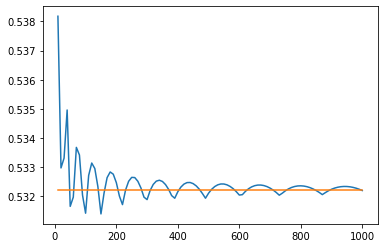

In [24]:
n = 100

# Model Parameters 
S0 = 13.25
K = 15
r = 0.0001
T = 1/12
sigma = 0.7471
style = 'euro'
type  = 'call'

# Initialize array 
optionPrices = np.empty((n,3))

# Populate array
for i in range(0,n):
    steps = (i+1)*10 
    optionPrices[i, 0] = steps
    d_t = T / steps
    u, d = up_down_factors(sigma, d_t)
    p_u, p_d, p_m = probability(r, sigma, d_t)
    S1=stock_price(S0, steps, u, d)
    C, P = priceTriEuro(steps, K, r, S1, p_u, p_d, p_m, d_t)
    optionPrices[i, 1] = C[0][0]
    optionPrices[i, 2] = black_scholes(S0, K, r, T, steps, sigma, style, type)

# print(optionPrices)
# print()

plt.plot(optionPrices[:,0],optionPrices[:,1], label='European Price')
plt.plot(optionPrices[:,0],optionPrices[:,2], label='B-S Price')
plt.show()